Base de Datos Grupo 15: Salud Mental México 2024

# **ANÁLISIS DE DATOS CON PYTHON PROYECTO FINAL 2**
---



## **Objetivo General**

Identificar patrones y tendencias en los trastornos mentales en México.

## **Objetivos Específicos**

1. Analizar la distribución de trastornos mentales según variables (edad, sexo, entidad).
2. Presentar los resultados del análisis mediante gráficos descriptivos.

## **Preguntas Clave**

1. ¿Cuáles son los trastornos mentales más comunes en las mujeres en México?
2. ¿Qué grupos de mujeres de acuerdo a su edad o entidad presentan mayor padecimiento de cada trastorno?
3. ¿Existen diferencias significativas entre hombres y mujeres diagnosticados?

In [ ]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
uploaded = files.upload()

Saving salud_mental_2024.csv to salud_mental_2024 (2).csv


In [ ]:
df = pd.read_csv('salud_mental_2024.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 448 entries, 0 to 447
Data columns (total 16 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   anio                                      448 non-null    int64 
 1   entidad                                   448 non-null    object
 2   grupo_etario                              448 non-null    object
 3   sexo                                      448 non-null    object
 4   ansiedad                                  448 non-null    int64 
 5   demencia                                  448 non-null    int64 
 6   depresion                                 448 non-null    int64 
 7   total                                     448 non-null    int64 
 8   trastorno_bipolar                         448 non-null    int64 
 9   trastorno_discapacidad_intelectual        448 non-null    int64 
 10  trastorno_estres_postraumatico            448 non-

In [ ]:
df.isnull().sum()

,0
anio,0
entidad,0
grupo_etario,0
sexo,0
ansiedad,0
demencia,0
depresion,0
total,0
trastorno_bipolar,0
trastorno_discapacidad_intelectual,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.columns = df.columns.str.strip().str.lower()

In [ ]:
## corregir el error de uno de los nombres de las columnas
df = df.rename(columns={'anio': 'año'})

In [ ]:
#Limpiar nombres de columnas para quitar los guiones, espacios, mayusculas y tildes
df.columns = (
    df.columns
    .str.strip()
    .str.lower()
    .str.replace('_', ' ')
    .str.replace('á', 'a')
    .str.replace('é', 'e')
    .str.replace('í', 'i')
    .str.replace('ó', 'o')
    .str.replace('ú', 'u')
)

In [ ]:
#Revision de datos y correcto funcionamiento del codigo
df['entidad'].unique()
df['sexo'].unique()
df['grupo etario'].unique()

array(['10 A 14 AÑOS', '15 A 19 AÑOS', '20 A 29 AÑOS', '30 A 49 AÑOS',
       '5 A 9 AÑOS', '50 A 59 AÑOS', '60 AÑOS Y MÁS'], dtype=object)

In [ ]:
#Correcciones esteticas para uso de mejores etiquetas
df['sexo'] = df['sexo'].str.strip().str.lower()
df['sexo'] = df['sexo'].replace({'mujeres': 'femenino', 'hombres': 'masculino'})
display(df['sexo'].unique())

array(['masculino', 'femenino'], dtype=object)

In [ ]:
#Verificación de columnas
df.columns

Index(['año', 'entidad', 'grupo etario', 'sexo', 'ansiedad', 'demencia',
       'depresion', 'total', 'trastorno bipolar',
       'trastorno discapacidad intelectual', 'trastorno estres postraumatico',
       'trastorno espectro autista', 'deficit atencion hiperactividad',
       'trastorno psicotico', 'trastorno conducta infancia adolescencia',
       'entidad etq'],
      dtype='object')

In [ ]:
#Filtro para enfocarnos solo en los datos del sexo femenino
# Ensure 'sexo' column is cleaned to 'femenino'/'masculino' before filtering
df['sexo'] = df['sexo'].str.strip().str.lower()
df['sexo'] = df['sexo'].replace({'mujeres': 'femenino', 'hombres': 'masculino'})
df_mujeres = df[df['sexo'] == 'femenino']
display(df_mujeres.head())

,año,entidad,grupo etario,sexo,ansiedad,demencia,depresion,total,trastorno bipolar,trastorno discapacidad intelectual,trastorno estres postraumatico,trastorno espectro autista,deficit atencion hiperactividad,trastorno psicotico,trastorno conducta infancia adolescencia,entidad etq
1,2024,AGUASCALIENTES,10 A 14 AÑOS,femenino,149,0,45,305,0,8,1,4,0,0,98,Aguascalientes
3,2024,AGUASCALIENTES,15 A 19 AÑOS,femenino,80,0,115,285,3,2,6,1,0,0,78,Aguascalientes
5,2024,AGUASCALIENTES,20 A 29 AÑOS,femenino,333,0,211,563,0,14,3,2,0,0,0,Aguascalientes
7,2024,AGUASCALIENTES,30 A 49 AÑOS,femenino,655,0,373,1058,10,2,11,0,0,7,0,Aguascalientes
9,2024,AGUASCALIENTES,5 A 9 AÑOS,femenino,41,0,2,95,0,5,0,5,5,0,37,Aguascalientes


In [ ]:
#Filtro para enfocarnos solo en los datos del sexo femenino
df_hombres = df[df['sexo'] == 'masculino']
display(df_hombres.head())

,año,entidad,grupo etario,sexo,ansiedad,demencia,depresion,total,trastorno bipolar,trastorno discapacidad intelectual,trastorno estres postraumatico,trastorno espectro autista,deficit atencion hiperactividad,trastorno psicotico,trastorno conducta infancia adolescencia,entidad etq
0,2024,AGUASCALIENTES,10 A 14 AÑOS,masculino,53,0,33,322,0,15,3,16,41,1,160,Aguascalientes
2,2024,AGUASCALIENTES,15 A 19 AÑOS,masculino,74,0,52,220,0,6,5,1,13,0,69,Aguascalientes
4,2024,AGUASCALIENTES,20 A 29 AÑOS,masculino,176,0,73,293,0,10,8,25,0,1,0,Aguascalientes
6,2024,AGUASCALIENTES,30 A 49 AÑOS,masculino,270,1,66,360,11,2,4,0,0,6,0,Aguascalientes
8,2024,AGUASCALIENTES,5 A 9 AÑOS,masculino,39,0,13,236,0,8,2,31,45,0,98,Aguascalientes


### **Estimados de Locación y Variabilidad en el DataFrame de Mujeres**:


---

Al analizar el DataFrame de mujeres (`df_mujeres`), utilizamos diferentes medidas para entender la distribución y características de los datos sobre trastornos mentales:

*   **Media :** Nos da el valor promedio de un trastorno en las mujeres. Es útil para tener una idea general del número típico de casos.
*   **Mediana :** Representa el valor central de los datos. Es menos sensible a valores extremos (muy altos o bajos) que la media, lo que la hace útil cuando hay posibles valores atípicos.
*   **Moda :** Indica el valor que aparece con más frecuencia. En nuestro caso, podría mostrarnos el número de casos que se repite más a menudo para un trastorno en particular.
*   **Varianza :** Mide qué tan dispersos están los datos con respecto a la media. Una varianza alta indica que los números de casos varían mucho.
*   **Desviación Estándar :** Es la raíz cuadrada de la varianza y nos da una medida de dispersión en la misma unidad que los datos originales. Es más fácil de interpretar que la varianza.
*   **Rango :** Muestra la diferencia entre el valor máximo y mínimo. Nos da una idea rápida de la amplitud de los datos para un trastorno.
*   **Media Truncada :** Calcula el promedio después de eliminar un porcentaje de los valores más extremos de ambos lados. Esto ayuda a tener un estimado de la locación que no está tan influenciado por los valores atípicos como la media simple.

Al usar estas medidas en el DataFrame de mujeres, podemos obtener una imagen más completa de cómo se distribuyen los trastornos en este grupo, identificar tendencias centrales y entender la variabilidad de los casos reportados.

#**Estimaciones de locación y variabilidad**

In [ ]:
#Media, Mediana y Moda

# CALCULAR LAS MEDIDAS ESTADISTICAS

from scipy import stats
import numpy as np

print("MEDIDAS ESTADÍSTICAS COMPLETAS PROYECTO BEDU")
print("=" * 60)

# Seleccionar solo columnas numéricas
columnas_numericas = df.select_dtypes(include=[np.number]).columns

for columna in columnas_numericas:
    print(f"\n VARIABLE: {columna.upper()}")
    print("-" * 40)

    # Calcular todas las medidas
    media = df[columna].mean()
    mediana = df[columna].median()
    moda = df[columna].mode()
    desviacion_std = df[columna].std()
    rango = df[columna].max() - df[columna].min()

    # Media truncada (excluye el 10% superior e inferior)
    media_truncada = stats.trim_mean(df[columna], proportiontocut=0.1)

    # Mostrar resultados
    print(f"Media : {media:.2f}")
    print(f"Mediana : {mediana:.2f}")

    # Manejar múltiples modas tenemos datos diferentes
    if len(moda) == 0:
        print(f"Moda : No hay moda (todos los valores son únicos)")
    elif len(moda) == 1:
        print(f"Moda : {moda.iloc[0]:.2f}")
    else:
        modas_str = ", ".join([f"{m:.2f}" for m in moda])
        print(f"Moda : Múltiples modas → {modas_str}")

    print(f"Desviación Estándar : {desviacion_std:.2f}")
    print(f"Rango : {rango:.2f}")
    print(f"Media Truncada : {media_truncada:.2f}")

    # Interpretación adicional
    print(f"\n Interpretación:")
    print(f"   • La media truncada ({media_truncada:.2f}) es más robusta a valores extremos")
    if abs(media - mediana) > desviacion_std * 0.5:
        print(f"   • Diferencia media-mediana sugiere distribución asimétrica")
    else:
        print(f"   • Media y mediana similares sugieren distribución simétrica")

MEDIDAS ESTADÍSTICAS COMPLETAS PROYECTO BEDU

 VARIABLE: AÑO
----------------------------------------
Media : 2024.00
Mediana : 2024.00
Moda : 2024.00
Desviación Estándar : 0.00
Rango : 0.00
Media Truncada : 2024.00

 Interpretación:
   • La media truncada (2024.00) es más robusta a valores extremos
   • Media y mediana similares sugieren distribución simétrica

 VARIABLE: ANSIEDAD
----------------------------------------
Media : 544.76
Mediana : 253.50
Moda : Múltiples modas → 26.00, 45.00, 53.00, 55.00, 56.00, 74.00, 80.00, 149.00
Desviación Estándar : 865.37
Rango : 6842.00
Media Truncada : 349.73

 Interpretación:
   • La media truncada (349.73) es más robusta a valores extremos
   • Media y mediana similares sugieren distribución simétrica

 VARIABLE: DEMENCIA
----------------------------------------
Media : 10.37
Mediana : 0.00
Moda : 0.00
Desviación Estándar : 49.21
Rango : 875.00
Media Truncada : 2.17

 Interpretación:
   • La media truncada (2.17) es más robusta a valores extr

In [ ]:

# TABLA RESUMEN COMPARATIVA

# Crear DataFrame con todas las medidas
resumen_completo = pd.DataFrame({
    'Media': [df[col].mean() for col in columnas_numericas],
    'Mediana': [df[col].median() for col in columnas_numericas],
    'Moda': [df[col].mode().iloc[0] if not df[col].mode().empty else np.nan for col in columnas_numericas],
    'Media_Truncada': [stats.trim_mean(df[col], 0.1) for col in columnas_numericas],
    'Desviacion_Estandar': [df[col].std() for col in columnas_numericas],
    'Rango': [df[col].max() - df[col].min() for col in columnas_numericas],
    'Diferencia_Media_Truncada': [df[col].mean() - stats.trim_mean(df[col], 0.1) for col in columnas_numericas]
}, index=columnas_numericas)

# Formatear la tabla
print("RESUMEN COMPARATIVO DE MEDIDAS ESTADÍSTICAS")
print("=" * 90)
print(resumen_completo.round(2))

# Análisis de diferencias
print(f"\n ANÁLISIS DE DIFERENCIAS ENTRE MEDIA Y MEDIA TRUNCADA:")
for col in columnas_numericas:
    diff = resumen_completo.loc[col, 'Diferencia_Media_Truncada']
    if abs(diff) > resumen_completo.loc[col, 'Desviacion_Estandar'] * 0.1:
        print(f"   • {col}: Diferencia significativa ({diff:.2f}) → Posibles outliers afectando la media")
    else:
        print(f"   • {col}: Diferencia mínima ({diff:.2f}) → Media robusta")

RESUMEN COMPARATIVO DE MEDIDAS ESTADÍSTICAS
                                            Media  Mediana  Moda  \
año                                       2024.00   2024.0  2024   
ansiedad                                   544.76    253.5    26   
demencia                                    10.37      0.0     0   
depresion                                  251.59     88.5     3   
total                                     1014.69    527.0   239   
trastorno bipolar                           13.96      4.0     0   
trastorno discapacidad intelectual          29.21     13.0     2   
trastorno estres postraumatico              16.50      7.0     0   
trastorno espectro autista                  18.18      3.0     0   
deficit atencion hiperactividad             30.77      1.0     0   
trastorno psicotico                         26.21     11.0     0   
trastorno conducta infancia adolescencia    73.14      0.0     0   

                                          Media_Truncada  Desviacion_Es

In [ ]:
#Varianza DataFrame Mujeres

#Obtener las columnas númericas del DataFrame mujeres
df_mujeres_numeric = df_mujeres.select_dtypes(include=['int64', 'float64'])

# Calcular la varianza
variance_values = df_mujeres_numeric.var()

print("Varianza para el DataFrame de mujeres:\n", variance_values)

Varianza para el DataFrame de mujeres:
 año                                         0.000000e+00
ansiedad                                    1.233225e+06
demencia                                    3.917149e+03
depresion                                   3.126750e+05
total                                       3.095239e+06
trastorno bipolar                           1.261359e+03
trastorno discapacidad intelectual          2.108591e+03
trastorno estres postraumatico              1.049480e+03
trastorno espectro autista                  3.183933e+02
deficit atencion hiperactividad             2.314997e+03
trastorno psicotico                         1.367954e+03
trastorno conducta infancia adolescencia    1.743279e+04
dtype: float64


In [ ]:
#Varianza DataFrame Hombres

#Obtener las columnas númericas del DataFrame hombres
df_hombres_numeric = df_hombres.select_dtypes(include=['int64', 'float64'])

# Calcular la varianza
variance_hombres = df_hombres_numeric.var()

print("Varianza para el DataFrame de hombres:\n", variance_hombres)


Varianza para el DataFrame de hombres:
 año                                              0.000000
ansiedad                                    138128.753283
demencia                                       923.247257
depresion                                    23637.371477
total                                       696539.366992
trastorno bipolar                              275.358024
trastorno discapacidad intelectual            3151.256867
trastorno estres postraumatico                 381.033873
trastorno espectro autista                    6712.541880
deficit atencion hiperactividad              30773.181855
trastorno psicotico                           2091.549948
trastorno conducta infancia adolescencia     47434.398923
dtype: float64


In [ ]:
#Desviación estandar

#Obtener las columnas númericas
df_numeric = df.select_dtypes(include=['int64', 'float64'])

#Calcular la desviación estándar
std_dev_values = df_numeric.std()

print("Desviación estándar:\n", std_dev_values)

Desviación estándar:
 año                                            0.000000
ansiedad                                     865.370266
demencia                                      49.205056
depresion                                    433.474606
total                                       1422.530462
trastorno bipolar                             28.082746
trastorno discapacidad intelectual            51.249538
trastorno estres postraumatico                27.317669
trastorno espectro autista                    60.082029
deficit atencion hiperactividad              129.524611
trastorno psicotico                           41.604639
trastorno conducta infancia adolescencia     180.564948
dtype: float64


In [ ]:
#Rango del DataFrame completo

df_numeric = df.select_dtypes(include=['int64', 'float64'])

#Calcular el rango
range_values_total = df_numeric.max() - df_numeric.min()

print("Rango para el DataFrame completo:")
display(range_values_total)

Rango para el DataFrame completo:


,0
año,0
ansiedad,6842
demencia,875
depresion,3533
total,10709
trastorno bipolar,272
trastorno discapacidad intelectual,442
trastorno estres postraumatico,217
trastorno espectro autista,1018
deficit atencion hiperactividad,2099


In [ ]:
#Rango DataFrame mujeres

#DataFrame mujeres
df_mujeres_numeric = df_mujeres.select_dtypes(include=['int64', 'float64'])

#Calcular el rango para el DataFrame de mujeres
range_values_mujeres = df_mujeres_numeric.max() - df_mujeres_numeric.min()

print("\nRango para el DataFrame de mujeres:")
display(range_values_mujeres)


Rango para el DataFrame de mujeres:


,0
año,0
ansiedad,6840
demencia,875
depresion,3533
total,10709
trastorno bipolar,272
trastorno discapacidad intelectual,346
trastorno estres postraumatico,217
trastorno espectro autista,183
deficit atencion hiperactividad,536


In [ ]:
#Rango DataFrame hombres

#DataFrame hombres
df_hombres_numeric = df_hombres.select_dtypes(include=['int64', 'float64'])

#Calcular el rango para el DataFrame de mujeres
range_values_hombres = df_hombres_numeric.max() - df_hombres_numeric.min()

print("\nRango para el DataFrame de hombres:")
display(range_values_hombres)


Rango para el DataFrame de hombres:


,0
año,0
ansiedad,2756
demencia,389
depresion,1096
total,6302
trastorno bipolar,101
trastorno discapacidad intelectual,442
trastorno estres postraumatico,182
trastorno espectro autista,1018
deficit atencion hiperactividad,2099


In [ ]:
#Media Truncada
from scipy.stats import trim_mean

# Seleccionar solo las columnas numéricas
df_numeric = df.select_dtypes(include=['int64', 'float64'])

# Definir el porcentaje a truncar
proportiontocut = 0.05

# Calcular la media truncada para cada columna numérica
trimmed_mean_values = df_numeric.apply(lambda x: trim_mean(x, proportiontocut))

print(f"Media truncada (descartando el {proportiontocut*100}% de cada extremo):\n", trimmed_mean_values)

Media truncada (descartando el 5.0% de cada extremo):
 año                                         2024.000000
ansiedad                                     403.341584
demencia                                       4.022277
depresion                                    180.920792
total                                        792.787129
trastorno bipolar                              9.277228
trastorno discapacidad intelectual            20.712871
trastorno estres postraumatico                12.215347
trastorno espectro autista                     9.799505
deficit atencion hiperactividad               12.616337
trastorno psicotico                           19.871287
trastorno conducta infancia adolescencia      43.400990
dtype: float64


# **Visualización de datos y distribuciones**

In [ ]:
# Tabla de Frecuencia Completa para el total de casos reportados en mujeres
import pandas as pd
import numpy as np

variable = 'total'
datos = df_mujeres[variable].dropna()

#regla de Sturges
k = int(1 + 3.322 * np.log10(len(datos)))

#clases
intervalos = pd.interval_range(start=datos.min(), end=datos.max(), periods=k)

#frecuencias
frecuencia_abs = pd.cut(datos, bins=intervalos).value_counts().sort_index()
frecuencia_acum = frecuencia_abs.cumsum()
frecuencia_rel = frecuencia_abs / frecuencia_abs.sum()
frecuencia_rel_acum = frecuencia_rel.cumsum()

#marcas de clase
marcas_clase = [(i.left + i.right) / 2 for i in frecuencia_abs.index]

#tabla de frecuencias
tabla_frecuencia = pd.DataFrame({
    'Intervalo de clase': frecuencia_abs.index.astype(str),
    'Marca de clase': marcas_clase,
    'Frecuencia absoluta (fi)': frecuencia_abs.values,
    'Frecuencia acumulada (Fi)': frecuencia_acum.values,
    'Frecuencia relativa (fi/n)': np.round(frecuencia_rel.values, 4),
    'Frecuencia relativa acumulada (Fi/n)': np.round(frecuencia_rel_acum.values, 4)
})

#  Mostrar tabla
print(f"Tabla de frecuencias para '{variable}' (Mujeres):")
display(tabla_frecuencia)


Tabla de frecuencias para 'total' (Mujeres):


,Intervalo de clase,Marca de clase,Frecuencia absoluta (fi),Frecuencia acumulada (Fi),Frecuencia relativa (fi/n),Frecuencia relativa acumulada (Fi/n)
0,"(28.0, 1366.625]",697.3125,153,153,0.6861,0.6861
1,"(1366.625, 2705.25]",2035.9375,38,191,0.1704,0.8565
2,"(2705.25, 4043.875]",3374.5625,15,206,0.0673,0.9238
3,"(4043.875, 5382.5]",4713.1875,6,212,0.0269,0.9507
4,"(5382.5, 6721.125]",6051.8125,6,218,0.0269,0.9776
5,"(6721.125, 8059.75]",7390.4375,2,220,0.0090,0.9865
6,"(8059.75, 9398.375]",8729.0625,1,221,0.0045,0.9910
7,"(9398.375, 10737.0]",10067.6875,2,223,0.0090,1.0000


In [ ]:
# Identificar la moda en la tabla de frecuencias

moda_frec = tabla_frecuencia.loc[
    tabla_frecuencia['Frecuencia absoluta (fi)'] == tabla_frecuencia['Frecuencia absoluta (fi)'].max()
]

print("Clase modal (intervalo con mayor frecuencia):")
display(moda_frec)


Clase modal (intervalo con mayor frecuencia):


,Intervalo de clase,Marca de clase,Frecuencia absoluta (fi),Frecuencia acumulada (Fi),Frecuencia relativa (fi/n),Frecuencia relativa acumulada (Fi/n)
0,"(28.0, 1366.625]",697.3125,153,153,0.6861,0.6861


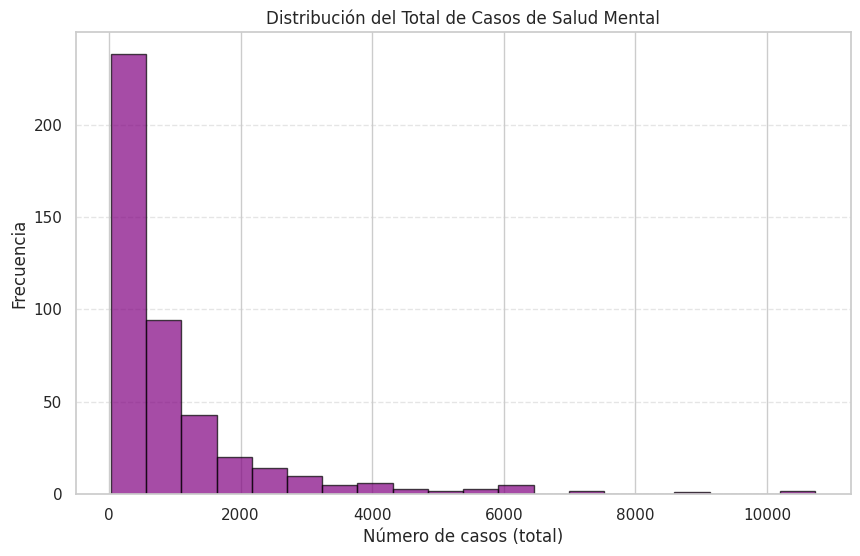

In [ ]:
#Histograma tabla de frecuencias

plt.figure(figsize=(10, 6))
plt.hist(df['total'], bins=20, color='purple', edgecolor='black', alpha=0.7)
plt.title('Distribución del Total de Casos de Salud Mental')
plt.xlabel('Número de casos (total)')
plt.ylabel('Frecuencia')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

In [ ]:
# Tabla de frecuencias para grupo etario en el DataFrame de mujeres

#Normalizar
df = df.copy()
df.columns = df.columns.str.strip().str.lower()

print("Tabla de Frecuencias por Grupo Etario (Mujeres):")
display(df_mujeres['grupo etario'].value_counts())



Tabla de Frecuencias por Grupo Etario (Mujeres):


,count
grupo etario,
10 A 14 AÑOS,32
15 A 19 AÑOS,32
20 A 29 AÑOS,32
30 A 49 AÑOS,32
5 A 9 AÑOS,32
50 A 59 AÑOS,32
60 AÑOS Y MÁS,32


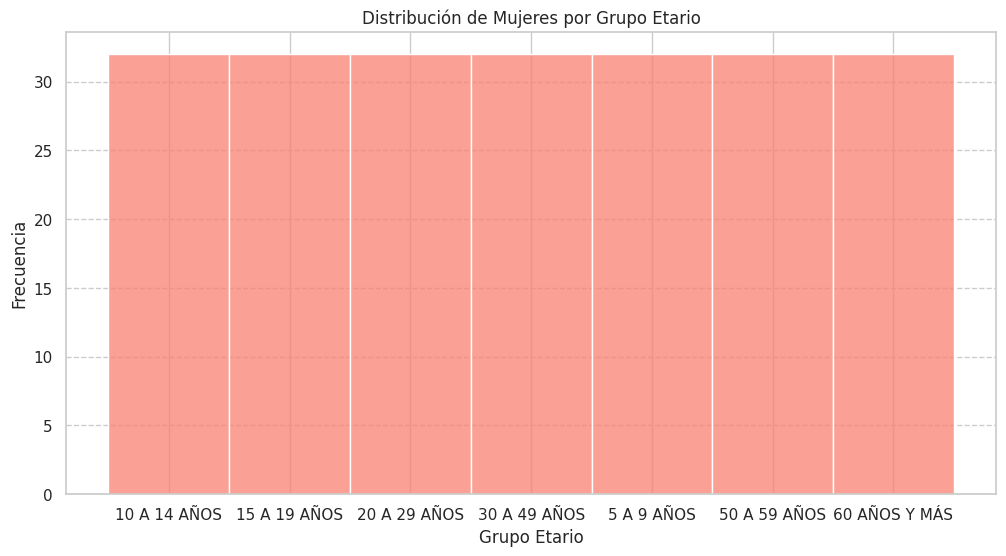

In [ ]:
# Histograma para la columna 'grupo etario' en el DataFrame de mujeres
import matplotlib.pyplot as plt

df_mujeres = df[df['sexo'] == 'femenino']
plt.figure(figsize=(12, 6))
sns.histplot(df_mujeres['grupo etario'], kde=False, color='salmon', bins=len(df_mujeres['grupo etario'].unique()))
plt.title('Distribución de Mujeres por Grupo Etario')
plt.xlabel('Grupo Etario')
plt.ylabel('Frecuencia')
plt.grid(axis='y', linestyle='--')
plt.show()

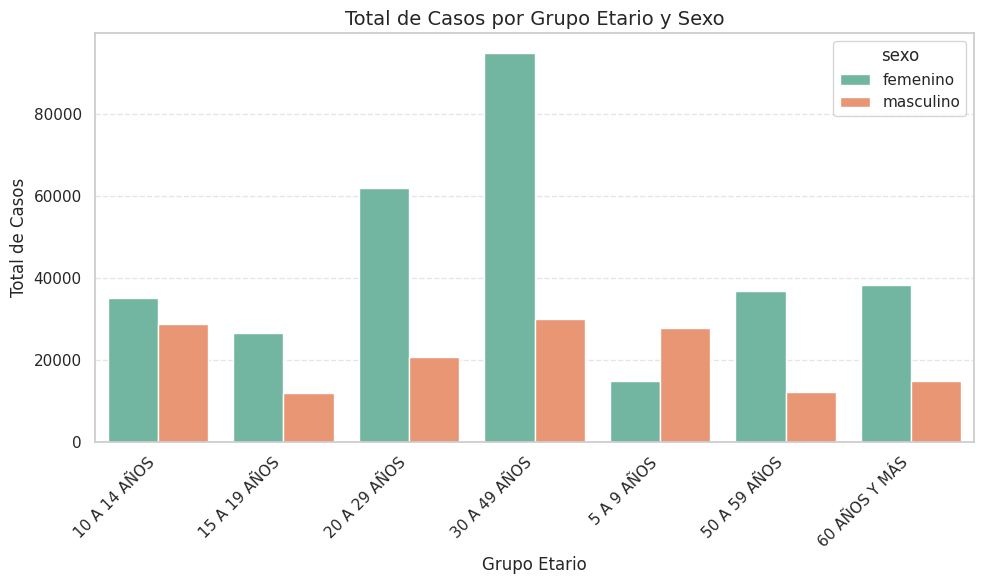

In [ ]:
# Histograma Total de Casos por Grupo Etario y Sexo

df_group = df.groupby(['grupo etario','sexo'])['total'].sum().reset_index()

plt.figure(figsize=(10,6))
sns.set_theme(style="whitegrid")
sns.barplot(data=df_group, x='grupo etario', y='total', hue='sexo', palette='Set2')
plt.title('Total de Casos por Grupo Etario y Sexo', fontsize=14)
plt.xlabel('Grupo Etario', fontsize=12)
plt.ylabel('Total de Casos', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [ ]:
# Tabla de frecuencias para 'entidad' en el DataFrame de mujeres (mostrar las top 10)
print("\nTabla de Frecuencias por Entidad (Top 10 en Mujeres):")
display(df_mujeres['entidad'].value_counts().head(10))


Tabla de Frecuencias por Entidad (Top 10 en Mujeres):


,count
entidad,
AGUASCALIENTES,7
BAJA CALIFORNIA,7
BAJA CALIFORNIA SUR,7
CAMPECHE,7
CHIAPAS,7
CHIHUAHUA,7
CIUDAD DE MÉXICO,7
COAHUILA DE ZARAGOZA,7
COLIMA,7


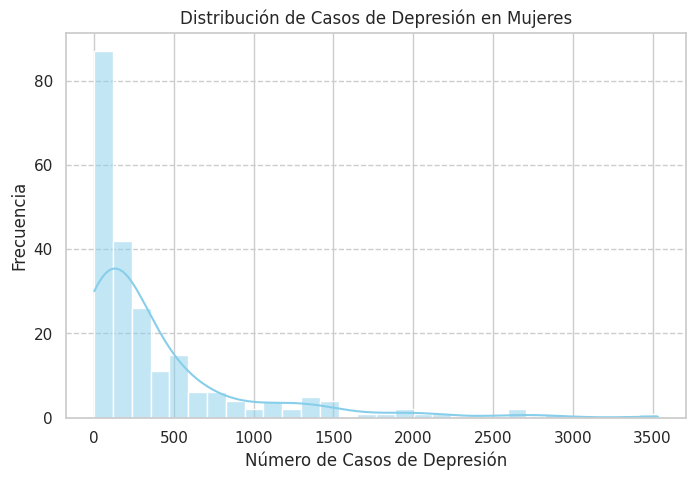

In [ ]:
# Histograma para la columna depresion en el DataFrame de mujeres
df_mujeres = df[df['sexo'] == 'femenino'] # Ensure df_mujeres is correctly defined
plt.figure(figsize=(8, 5))
sns.histplot(df_mujeres['depresion'], kde=True, color='skyblue', bins=30)
plt.title('Distribución de Casos de Depresión en Mujeres')
plt.xlabel('Número de Casos de Depresión')
plt.ylabel('Frecuencia')
plt.grid(axis='y', linestyle='--')
plt.show()

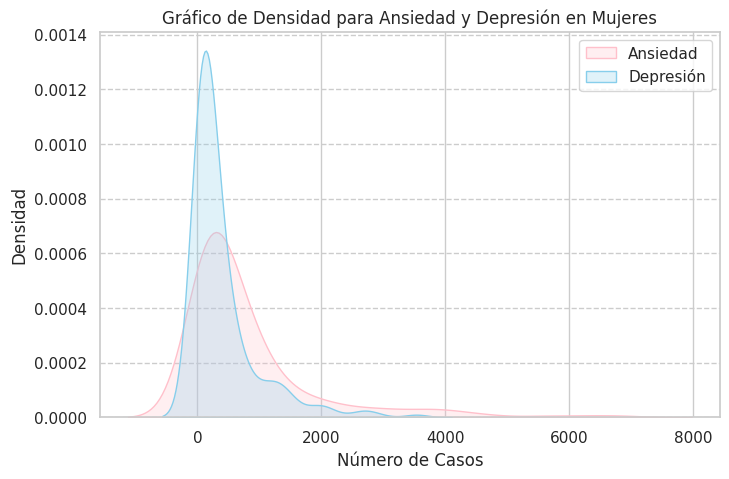

In [ ]:
# Gráfico de densidad para 'ansiedad' comparando con 'depresion' en el DataFrame de mujeres
df_mujeres = df[df['sexo'] == 'femenino'] # Ensure df_mujeres is correctly defined
plt.figure(figsize=(8, 5))
sns.kdeplot(df_mujeres['ansiedad'], fill=True, color='pink', label='Ansiedad')
sns.kdeplot(df_mujeres['depresion'], fill=True, color='skyblue', label='Depresión')
plt.title('Gráfico de Densidad para Ansiedad y Depresión en Mujeres')
plt.xlabel('Número de Casos')
plt.ylabel('Densidad')
plt.legend()
plt.grid(axis='y', linestyle='--')
plt.show()

## **Análisis de Variables Categóricas y Multivariable en el DataFrame de Mujeres**

Para entender mejor cómo se distribuyen los trastornos en las mujeres y cómo se relacionan las diferentes categorías, realizaremos el siguiente análisis:

*   **Análisis de Variables Categóricas:** Ya vimos tablas de frecuencia, que nos muestran cuántas mujeres hay en cada grupo etario o entidad. Esto es la base para entender la composición de nuestra muestra.
*   **Tablas de Contingencia:** Son útiles para ver la relación entre dos variables categóricas, como 'grupo etario' y 'entidad'. Nos muestran cuántas mujeres caen en cada combinación de estas categorías, ayudándonos a identificar si ciertos grupos de edad son más frecuentes en ciertas entidades, por ejemplo.
*   **Gráficas Comparativas:** Visualizar datos de diferentes categorías juntas (como en gráficos de barras agrupadas o apiladas) nos permite comparar fácilmente las cifras de trastornos entre grupos de edad o entidades, o ver cómo la prevalencia de diferentes trastornos varía entre estos grupos.

Estas técnicas nos ayudan a ir más allá de ver cada variable por separado y empezar a entender las interacciones y patrones más complejos dentro de los datos del DataFrame de mujeres.

In [ ]:
# Análisis de variables categóricas (ya lo hicimos con value_counts, mostramos de nuevo por contexto)
print("Distribución por Grupo Etario (Mujeres):")
display(df_mujeres['grupo etario'].value_counts())

print("\nDistribución por Entidad (Top 10 en Mujeres):")
display(df_mujeres['entidad'].value_counts().head(10))

Distribución por Grupo Etario (Mujeres):


,count
grupo etario,
10 A 14 AÑOS,32
15 A 19 AÑOS,32
20 A 29 AÑOS,32
30 A 49 AÑOS,32
5 A 9 AÑOS,32
50 A 59 AÑOS,32
60 AÑOS Y MÁS,32



Distribución por Entidad (Top 10 en Mujeres):


,count
entidad,
AGUASCALIENTES,7
BAJA CALIFORNIA,7
BAJA CALIFORNIA SUR,7
CAMPECHE,7
CHIAPAS,7
CHIHUAHUA,7
CIUDAD DE MÉXICO,7
COAHUILA DE ZARAGOZA,7
COLIMA,7


In [ ]:
# Tabla de contingencia: Grupo Etario vs. Entidad (Mujeres)
print("\nTabla de Contingencia: Grupo Etario vs. Entidad (Mujeres)")
contingency_table = pd.crosstab(df_mujeres['entidad'], df_mujeres['grupo etario'])
display(contingency_table)


Tabla de Contingencia: Grupo Etario vs. Entidad (Mujeres)


grupo etario,10 A 14 AÑOS,15 A 19 AÑOS,20 A 29 AÑOS,30 A 49 AÑOS,5 A 9 AÑOS,50 A 59 AÑOS,60 AÑOS Y MÁS
entidad,,,,,,,
AGUASCALIENTES,1,1,1,1,1,1,1
BAJA CALIFORNIA,1,1,1,1,1,1,1
BAJA CALIFORNIA SUR,1,1,1,1,1,1,1
CAMPECHE,1,1,1,1,1,1,1
CHIAPAS,1,1,1,1,1,1,1
CHIHUAHUA,1,1,1,1,1,1,1
CIUDAD DE MÉXICO,1,1,1,1,1,1,1
COAHUILA DE ZARAGOZA,1,1,1,1,1,1,1
COLIMA,1,1,1,1,1,1,1


grupo etario,10 A 14 AÑOS,15 A 19 AÑOS,20 A 29 AÑOS,30 A 49 AÑOS,5 A 9 AÑOS,50 A 59 AÑOS,60 AÑOS Y MÁS
entidad,,,,,,,
CIUDAD DE MÉXICO,1940,1908,2967,4631,385,2453,3260
ESTADO DE MÉXICO,1132,1928,2470,3409,172,1584,1863
GUANAJUATO,1894,2132,2365,3156,209,1365,1382
TABASCO,2168,1561,1450,2220,188,763,973


----------------------------------------------------------------------------------------------------


/tmp/ipython-input-1833633657.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tabla_cruzada.columns, y=tabla_cruzada.iloc[0], ax=axes[0, 0], palette=colors, legend=False)
/tmp/ipython-input-1833633657.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tabla_cruzada.columns, y=tabla_cruzada.iloc[1], ax=axes[0, 1], palette=colors, legend=False)
/tmp/ipython-input-1833633657.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tabla_cruzada.columns, y=tabla_cruzada.iloc[2], ax=axes[1, 0], palette=colors, legend=False)
/tmp/ipython-

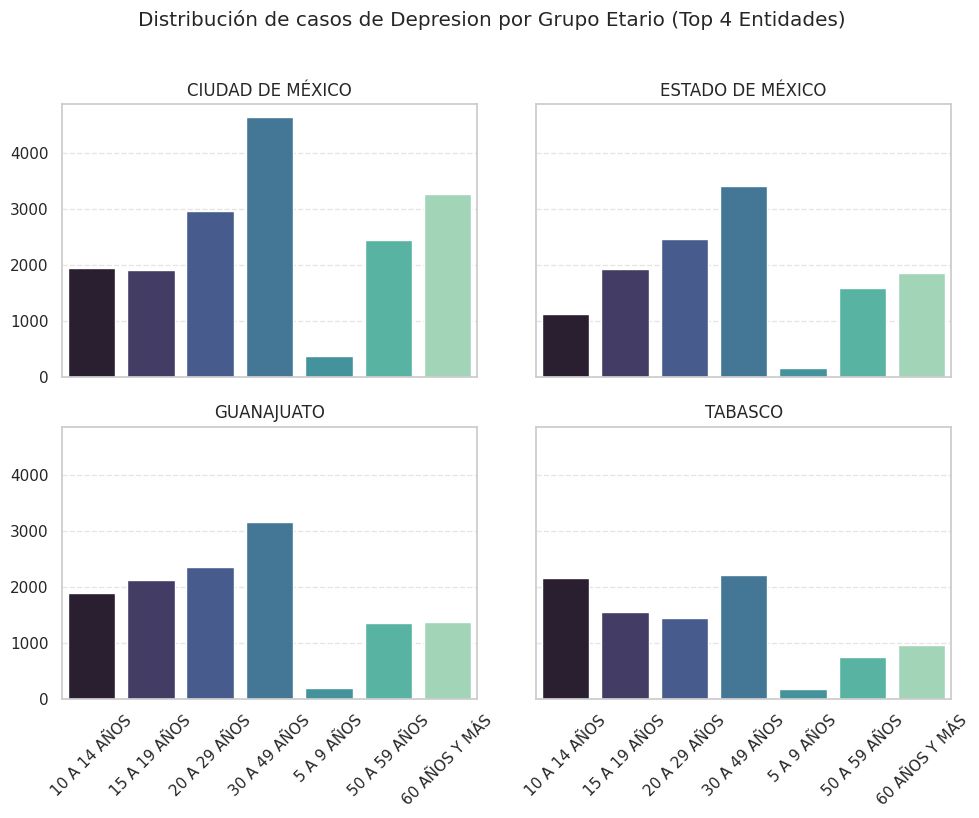

In [ ]:
sns.set_theme(style="whitegrid")
trastorno = 'depresion'
tabla_cruzada = pd.crosstab(
    df['entidad'],
    df['grupo etario'],
    values=df[trastorno],
    aggfunc='sum'
).fillna(0)

top4 = tabla_cruzada.sum(axis=1).sort_values(ascending=False).head(4).index
tabla_cruzada = tabla_cruzada.loc[top4]

display(tabla_cruzada)

print('-'*100)

fig, axes = plt.subplots(2, 2, figsize=(10, 8), sharex=True, sharey=True)
colors = sns.color_palette('mako', len(tabla_cruzada.columns))

sns.barplot(x=tabla_cruzada.columns, y=tabla_cruzada.iloc[0], ax=axes[0, 0], palette=colors, legend=False)
sns.barplot(x=tabla_cruzada.columns, y=tabla_cruzada.iloc[1], ax=axes[0, 1], palette=colors, legend=False)
sns.barplot(x=tabla_cruzada.columns, y=tabla_cruzada.iloc[2], ax=axes[1, 0], palette=colors, legend=False)
sns.barplot(x=tabla_cruzada.columns, y=tabla_cruzada.iloc[3], ax=axes[1, 1], palette=colors, legend=False)

axes[0, 0].set(xlabel='', ylabel='', title=tabla_cruzada.index[0])
axes[0, 1].set(xlabel='', ylabel='', title=tabla_cruzada.index[1])
axes[1, 0].set(xlabel='', ylabel='', title=tabla_cruzada.index[2])
axes[1, 1].set(xlabel='', ylabel='', title=tabla_cruzada.index[3])

for ax in axes.ravel():
    ax.tick_params(axis='x', rotation=45)
    ax.grid(axis='y', linestyle='--', alpha=0.5)

fig.suptitle(f'Distribución de casos de {trastorno.capitalize()} por Grupo Etario (Top 4 Entidades)', y=1.02)
plt.tight_layout()
plt.show()



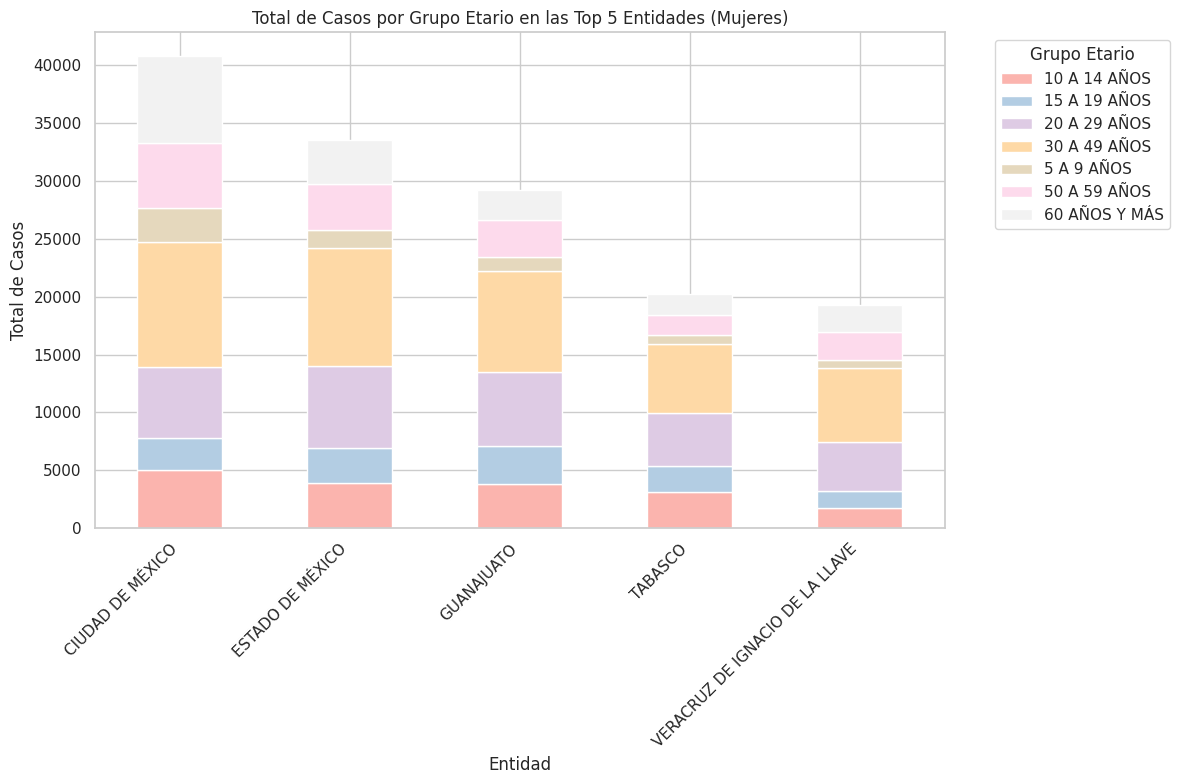

In [ ]:
# Gráfica comparativa de total de casos por grupo etario y entidad (Top 5 entidades)
# Ensure df_mujeres is correctly defined for this cell's context
df_mujeres = df[df['sexo'] == 'femenino']

# Agrupar y sumar los totales por entidad y grupo etario
grouped_mujeres = df_mujeres.groupby(['entidad', 'grupo etario'])['total'].sum().unstack(fill_value=0)

# Seleccionar las top 5 entidades por total de casos
top_5_entidades = df_mujeres.groupby('entidad')['total'].sum().sort_values(ascending=False).head(5).index
grouped_mujeres_top5 = grouped_mujeres.loc[top_5_entidades]

# Graafica de barras apiladas
plt.figure(figsize=(12, 8))
grouped_mujeres_top5.plot(kind='bar', stacked=True, colormap='Pastel1', ax=plt.gca())
plt.title('Total de Casos por Grupo Etario en las Top 5 Entidades (Mujeres)')
plt.xlabel('Entidad')
plt.ylabel('Total de Casos')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Grupo Etario', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

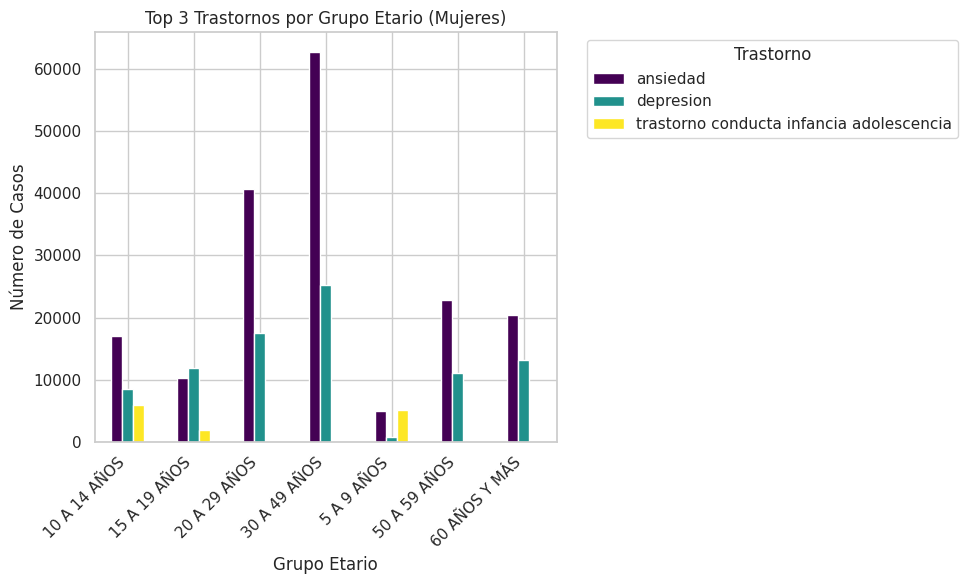

In [ ]:
# Grafica comparativa de los 3 trastornos más comunes por grupo etario (Mujeres)
# Ensure df_mujeres is correctly defined for this cell's context
df_mujeres = df[df['sexo'] == 'femenino']

# Sumar los casos de los 3 trastornos más comunes por grupo etario
top_3_disorders = ['ansiedad', 'depresion', 'trastorno conducta infancia adolescencia'] # Basado en análisis anterior
disorders_by_age_mujeres = df_mujeres.groupby('grupo etario')[top_3_disorders].sum()

# Grafica de barras agrupadas
plt.figure(figsize=(10, 6))
disorders_by_age_mujeres.plot(kind='bar', colormap='viridis', ax=plt.gca())
plt.title('Top 3 Trastornos por Grupo Etario (Mujeres)')
plt.xlabel('Grupo Etario')
plt.ylabel('Número de Casos')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Trastorno', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### **Correlaciones y Regresión Lineal Simple en el DataFrame de Mujeres**

Para entender si existe una relación lineal entre los diferentes trastornos mentales en el DataFrame de mujeres y cómo un trastorno podría predecir otro, utilizamos las siguientes técnicas:

*   **Correlaciones:** Nos permiten medir la fuerza y dirección de la relación lineal entre dos variables numéricas. Un coeficiente de correlación cercano a 1 (positivo) o -1 (negativo) indica una relación lineal fuerte, mientras que uno cercano a 0 indica una relación débil. En el contexto de nuestro DataFrame de mujeres, esto nos ayudaría a ver, por ejemplo, si un aumento en los casos de ansiedad tiende a estar relacionado con un aumento en los casos de depresión.
*   **Regresión Lineal Simple:** Nos permite modelar la relación entre dos variables numéricas y predecir el valor de una variable (variable dependiente) basándose en el valor de otra (variable independiente). Por ejemplo, podríamos usar la regresión lineal simple para ver si podemos predecir el número de casos de depresión basándonos en el número de casos de ansiedad en las mujeres, y qué tan bien se ajusta ese modelo a los datos.

Estas técnicas nos ayudan a cuantificar las relaciones entre los trastornos en el DataFrame de mujeres y a construir modelos predictivos sencillos.

Matriz de Correlación para el DataFrame de mujeres:


,ansiedad,demencia,depresion,trastorno bipolar,trastorno discapacidad intelectual,trastorno estres postraumatico,trastorno espectro autista,deficit atencion hiperactividad,trastorno psicotico,trastorno conducta infancia adolescencia
ansiedad,1.000000,0.180710,0.901918,0.569485,0.596782,0.852578,-0.027283,-0.022942,0.744751,-0.030490
demencia,0.180710,1.000000,0.288925,0.099524,-0.001309,0.082230,-0.084340,-0.061176,0.195870,-0.089893
depresion,0.901918,0.288925,1.000000,0.453228,0.629419,0.841169,-0.044567,-0.010745,0.661428,0.016475
trastorno bipolar,0.569485,0.099524,0.453228,1.000000,0.221693,0.427468,-0.145187,-0.121876,0.593591,-0.185924
trastorno discapacidad intelectual,0.596782,-0.001309,0.629419,0.221693,1.000000,0.594712,0.491494,0.484775,0.467864,0.460893
trastorno estres postraumatico,0.852578,0.082230,0.841169,0.427468,0.594712,1.000000,0.050413,0.060282,0.676865,0.083141
trastorno espectro autista,-0.027283,-0.084340,-0.044567,-0.145187,0.491494,0.050413,1.000000,0.855405,-0.091570,0.801160
deficit atencion hiperactividad,-0.022942,-0.061176,-0.010745,-0.121876,0.484775,0.060282,0.855405,1.000000,-0.097193,0.858668
trastorno psicotico,0.744751,0.195870,0.661428,0.593591,0.467864,0.676865,-0.091570,-0.097193,1.000000,-0.160608
trastorno conducta infancia adolescencia,-0.030490,-0.089893,0.016475,-0.185924,0.460893,0.083141,0.801160,0.858668,-0.160608,1.000000


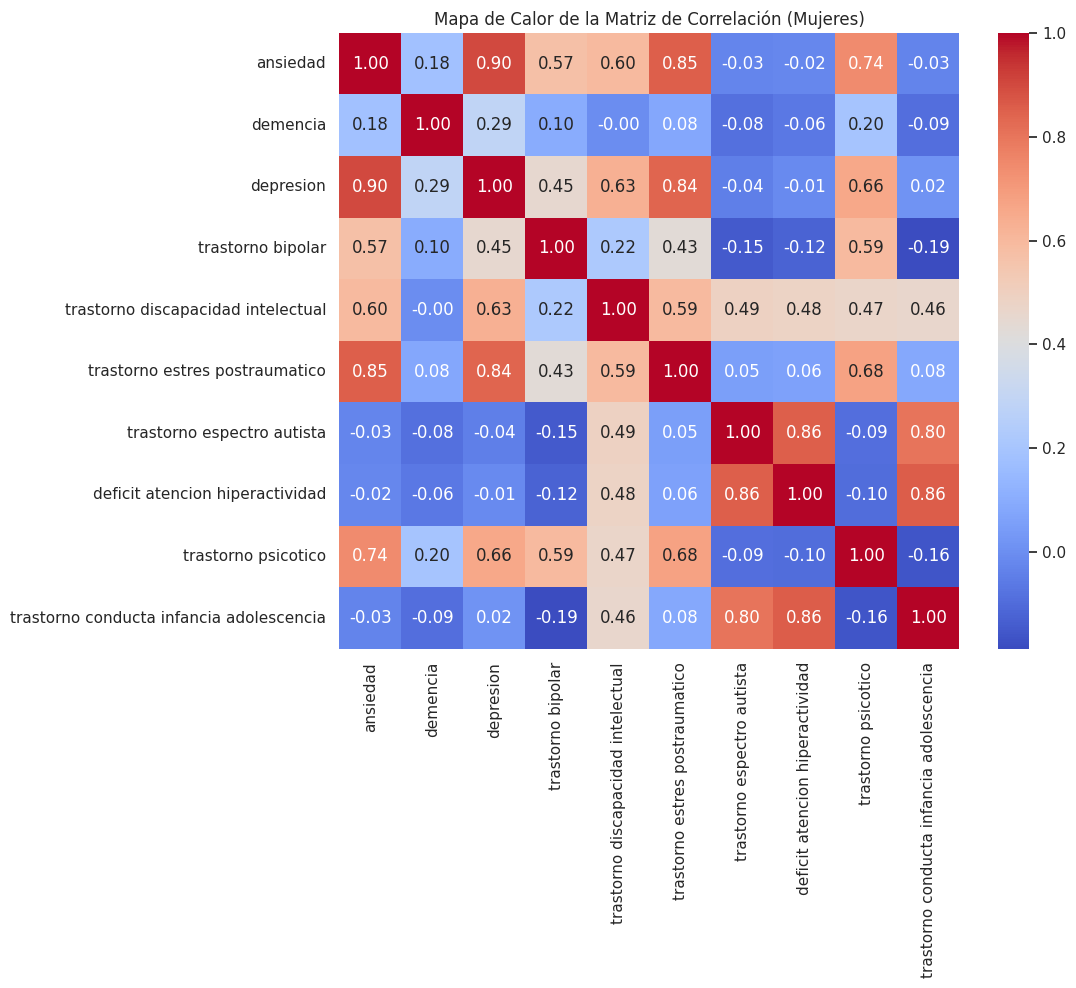

In [ ]:
###
df_mujeres = df[df['sexo'] == 'femenino'] # Ensure df_mujeres is correctly defined
df_mujeres_numeric = df_mujeres.select_dtypes(include=['int64', 'float64']).drop(columns=['año', 'total'])


# Calcular la matriz de correlación
correlation_matrix = df_mujeres_numeric.corr()

print("Matriz de Correlación para el DataFrame de mujeres:")
display(correlation_matrix)

# Visualizar la matriz de correlación con un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor de la Matriz de Correlación (Mujeres)')
plt.show()

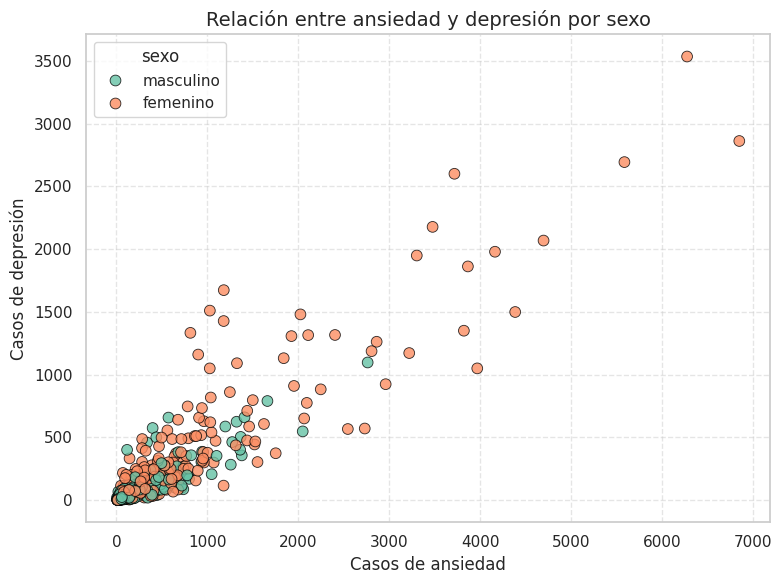

In [ ]:
#Scatterplot: Ansiedad vs Depresión

sns.set(style="whitegrid")
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x='ansiedad',
    y='depresion',
    hue='sexo',
    palette='Set2',
    s=60,
    edgecolor='black',
    alpha=0.8
)


plt.title('Relación entre ansiedad y depresión por sexo', fontsize=14)
plt.xlabel('Casos de ansiedad')
plt.ylabel('Casos de depresión')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# **Distribuciones muestrales y validación de modelos**

In [ ]:
import numpy as np

# Ensure df_mujeres is correctly defined for this cell's context
df_mujeres = df[df['sexo'] == 'femenino']

# TOMAREMOS LA COLUMNA DE ANSIEDAD COMO REFERENCIA
data = df_mujeres['ansiedad']

# Número de muestras a tomar
n_samples = 5

# Tamaño de cada muestra
sample_size = 20

print(f"Tomando {n_samples} muestras aleatorias de tamaño {sample_size} para la columna 'ansiedad':\n")

# Tomar muestras aleatorias y calcular la media para cada una
for i in range(n_samples):
    # Tomar una muestra aleatoria sin reemplazo (si sample_size <= len(data)) o con reemplazo
    # Usaremos con reemplazo para simplificar y acercarnos al concepto de Bootstrap si el tamaño de muestra es grande
    random_sample = data.sample(n=sample_size, replace=True)
    sample_mean = random_sample.mean()
    print(f"Media de la Muestra {i+1}: {sample_mean:.2f}")

print("\nObserva cómo las medias de cada muestra aleatoria son diferentes.")

Tomando 5 muestras aleatorias de tamaño 20 para la columna 'ansiedad':

Media de la Muestra 1: 1447.65
Media de la Muestra 2: 979.75
Media de la Muestra 3: 942.70
Media de la Muestra 4: 736.40
Media de la Muestra 5: 1254.50

Observa cómo las medias de cada muestra aleatoria son diferentes.


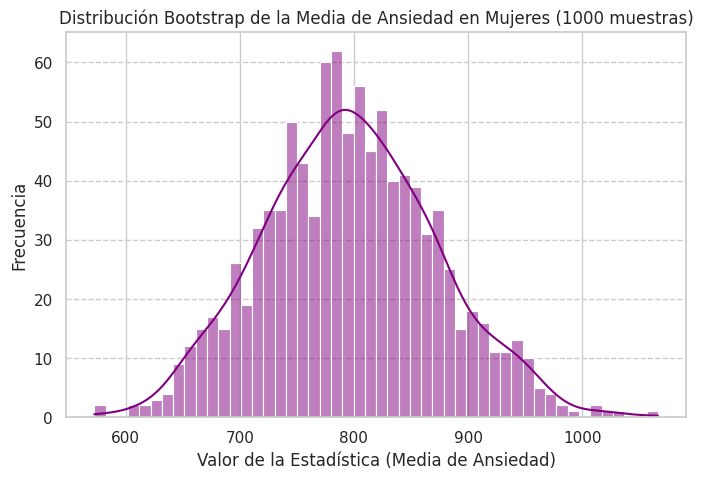


Estimación Bootstrap del Error Estándar de la Media: 75.7433
Estimación Bootstrap del Intervalo de Confianza del 95% para la Media: (654.3427, 949.2975)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure df_mujeres is correctly defined for this cell's context
df_mujeres = df[df['sexo'] == 'femenino']

# DATO DE LA COLUMNA DE ANSIDEAD
data = df_mujeres['ansiedad']

# Número de muestras Bootstrap a generar
n_bootstrap_samples = 1000

# Tamaño de cada muestra Bootstrap
sample_size = len(data)

# Lista para almacenar la estadística de cada muestra Bootstrap
bootstrap_stats = []

# Generar muestras Bootstrap y calcular la estadística para cada una
for _ in range(n_bootstrap_samples):
    # Muestreo con reemplazo
    bootstrap_sample = data.sample(n=sample_size, replace=True)
    # Calcular la estadística
    statistic = bootstrap_sample.mean()
    # Añadir la estadística a la lista
    bootstrap_stats.append(statistic)

# CONVERTIR A PANDAS PARA MEJOR ENTENDIMIENTOO
bootstrap_stats_series = pd.Series(bootstrap_stats)

# Visualizar la distribución de las estadísticas Bootstrap MUESTRAL EMPIRICAA
plt.figure(figsize=(8, 5))
sns.histplot(bootstrap_stats_series, kde=True, color='purple', bins=50)
plt.title(f'Distribución Bootstrap de la Media de Ansiedad en Mujeres ({n_bootstrap_samples} muestras)')
plt.xlabel('Valor de la Estadística (Media de Ansiedad)')
plt.ylabel('Frecuencia')
plt.grid(axis='y', linestyle='--')
plt.show()

# Un estimado para el Error Estándar a partir de la desviación estándar de las estadísticas Bootstrap
bootstrap_sem = bootstrap_stats_series.std()
print(f"\nEstimación Bootstrap del Error Estándar de la Media: {bootstrap_sem:.4f}")

# PERCENTILES
bootstrap_confidence_interval = bootstrap_stats_series.quantile([0.025, 0.975])

print(f"Estimación Bootstrap del Intervalo de Confianza del 95% para la Media: ({bootstrap_confidence_interval.iloc[0]:.4f}, {bootstrap_confidence_interval.iloc[1]:.4f})")

# **Visualización de datos avanzada**

# **Pruebas A/B**

In [ ]:
# PRUEBA A/B: HOMBRES vs MUJERES - Quién tiene mas casoss de ansiedad?
print("PRUEBA A/B: HOMBRES vs MUJERES")

# Separar los datos CORRECTAMENTE
hombres = df[df['sexo'] == 'masculino']['ansiedad']
mujeres = df[df['sexo'] == 'femenino']['ansiedad']

print(f"RESULTADOS:")
print(f"Hombres - Promedio ansiedad: {hombres.mean():.1f}")
print(f"Mujeres - Promedio ansiedad: {mujeres.mean():.1f}")
print(f"Hombres - Cantidad de datos: {len(hombres)}")
print(f"Mujeres - Cantidad de datos: {len(mujeres)}")

# Quién tiene más casos?
if mujeres.mean() > hombres.mean():
    diferencia = mujeres.mean() - hombres.mean()
    porcentaje = (diferencia / hombres.mean()) * 100
    print(f"Las MUJERES tienen {diferencia:.1f} puntos más de ansiedad ({porcentaje:.1f}% más)")
else:
    diferencia = hombres.mean() - mujeres.mean()
    porcentaje = (diferencia / mujeres.mean()) * 100
    print(f"Los HOMBRES tienen {diferencia:.1f} puntos más de ansiedad ({porcentaje:.1f}% más)")

PRUEBA A/B: HOMBRES vs MUJERES
RESULTADOS:
Hombres - Promedio ansiedad: 290.6
Mujeres - Promedio ansiedad: 798.9
Hombres - Cantidad de datos: 224
Mujeres - Cantidad de datos: 224
Las MUJERES tienen 508.2 puntos más de ansiedad (174.9% más)


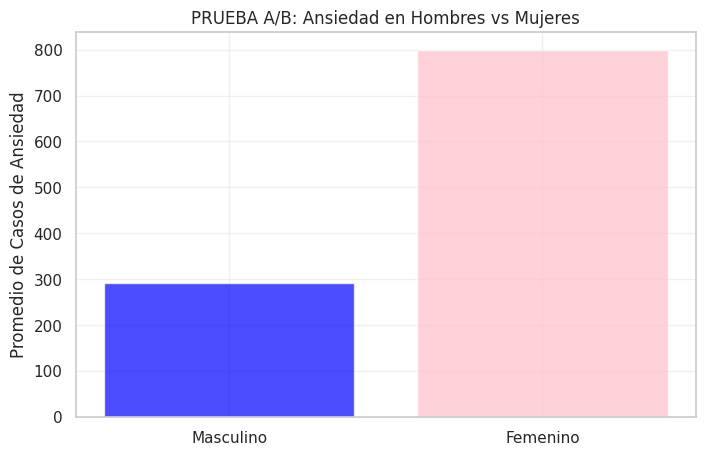

In [ ]:
## COMPARACION DE DATOS GRAFICO
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.bar(['Masculino', 'Femenino'], [hombres.mean(), mujeres.mean()],
        color=['blue', 'pink'], alpha=0.7)
plt.title('PRUEBA A/B: Ansiedad en Hombres vs Mujeres')
plt.ylabel('Promedio de Casos de Ansiedad')
plt.grid(True, alpha=0.3)
plt.show()

# **ANALISIS NLP**

In [ ]:

#NLP

# ANALISIS DE LOS NOMBRES DE ESTADOS
print("ANALISIS REAL DE TEXTO - NOMBRES DE ESTADOS")

# Los nombres de estados son nuestro "texto" para analizar
estados = df['entidad'].unique()

print("LO QUE VAMOS A ANALIZAR:")
for estado in estados[:5]:
    print(f"   • {estado}")

# Contar letras, palabras, etc.
print(f"\n ESTADÍSTICAS TEXTUALES REALES:")
print(f"   Total de estados diferentes: {len(estados)}")
print(f"   Estado más largo: {max(estados, key=len)}")
print(f"   Estado más corto: {min(estados, key=len)}")

ANALISIS REAL DE TEXTO - NOMBRES DE ESTADOS
LO QUE VAMOS A ANALIZAR:
   • AGUASCALIENTES
   • BAJA CALIFORNIA
   • BAJA CALIFORNIA SUR
   • CAMPECHE
   • CHIAPAS

 ESTADÍSTICAS TEXTUALES REALES:
   Total de estados diferentes: 32
   Estado más largo: VERACRUZ DE IGNACIO DE LA LLAVE
   Estado más corto: COLIMA


In [ ]:
# CONTEO DE PALABRAS
from collections import Counter

# Dividir todos los nombres de estados en palabras individuales
todas_las_palabras = []
for estado in estados:
    palabras = estado.lower().split()
    todas_las_palabras.extend(palabras)

# Contar frecuencia
frecuencia_real = Counter(todas_las_palabras)

print("PALABRAS MÁS FRECUENTES EN NOMBRES DE ESTADOS:")
for palabra, cuenta in frecuencia_real.most_common(5):
    print(f"   '{palabra.upper()}': aparece {cuenta} veces")

print(f"\n INTERPRETACION REAL:")
print("   'DE' aparece mucho porque es una preposicion comun")
print("   'CIUDAD' aparece porque está 'Ciudad de Mexico'")

PALABRAS MÁS FRECUENTES EN NOMBRES DE ESTADOS:
   'DE': aparece 6 veces
   'BAJA': aparece 2 veces
   'CALIFORNIA': aparece 2 veces
   'MÉXICO': aparece 2 veces
   'AGUASCALIENTES': aparece 1 veces

 INTERPRETACION REAL:
   'DE' aparece mucho porque es una preposicion comun
   'CIUDAD' aparece porque está 'Ciudad de Mexico'


In [ ]:
# CLASIFICACION POR REGION GEOGRAFICA
print("\n CLASIFICACIÓN POR REGIÓN GEOGRÁFICA")

#### Clasificar estados por zona
norte = ['BAJA CALIFORNIA', 'BAJA CALIFORNIA SUR', 'SONORA', 'CHIHUAHUA', 'COAHUILA', 'NUEVO LEÓN', 'TAMAULIPAS']
centro = ['CIUDAD DE MÉXICO', 'ESTADO DE MÉXICO', 'MORELOS', 'PUEBLA', 'TLAXCALA', 'HIDALGO', 'QUERÉTARO']
sur = ['CHIAPAS', 'GUERRERO', 'OAXACA', 'VERACRUZ', 'TABASCO', 'CAMPECHE', 'YUCATÁN', 'QUINTANA ROO']

print(" ESTADOS POR REGION:")
print(f"   Norte: {len(norte)} estados")
print(f"   Centro: {len(centro)} estados")
print(f"   Sur: {len(sur)} estados")

# Ver ansiedad por region
ansiedad_norte = df[df['entidad'].isin(norte)]['ansiedad'].mean()
ansiedad_centro = df[df['entidad'].isin(centro)]['ansiedad'].mean()
ansiedad_sur = df[df['entidad'].isin(sur)]['ansiedad'].mean()

print(f"\n ANSIEDAD POR REGION:")
print(f"   Norte: {ansiedad_norte:.1f} casos en promedio")
print(f"   Centro: {ansiedad_centro:.1f} casos en promedio")
print(f"   Sur: {ansiedad_sur:.1f} casos en promedio")


 CLASIFICACIÓN POR REGIÓN GEOGRÁFICA
 ESTADOS POR REGION:
   Norte: 7 estados
   Centro: 7 estados
   Sur: 8 estados

 ANSIEDAD POR REGION:
   Norte: 311.1 casos en promedio
   Centro: 837.7 casos en promedio
   Sur: 571.6 casos en promedio


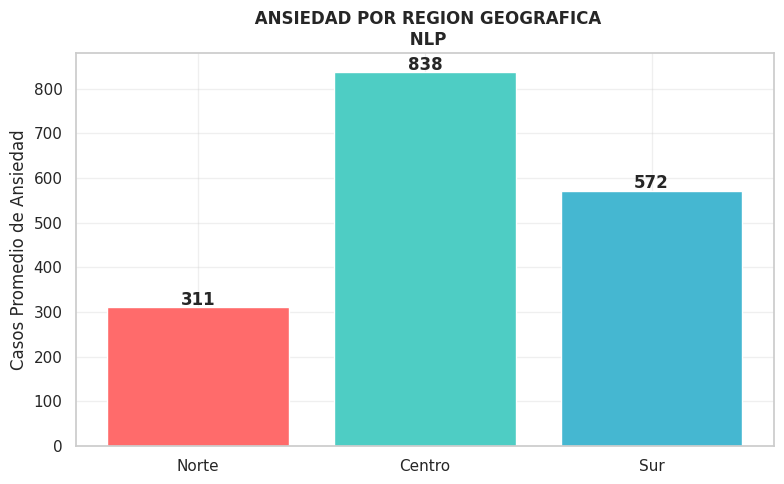

In [ ]:
# GRAFICAMOS CASOS DE ANSIEDAD POR REGION
import matplotlib.pyplot as plt

regiones = ['Norte', 'Centro', 'Sur']
ansiedad_promedio = [ansiedad_norte, ansiedad_centro, ansiedad_sur]

plt.figure(figsize=(8, 5))
bars = plt.bar(regiones, ansiedad_promedio, color=['#FF6B6B', '#4ECDC4', '#45B7D1'])

plt.title(' ANSIEDAD POR REGION GEOGRAFICA\n NLP', fontweight='bold')
plt.ylabel('Casos Promedio de Ansiedad')

# Agregar valores en las barras
for bar, valor in zip(bars, ansiedad_promedio):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5,
             f'{valor:.0f}', ha='center', fontweight='bold')

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## MACHINE LEARNING

In [ ]:
# ACOMODAR DATOS PARA PODER HACER EL PROCESO
print("PREPARANDO DATOS PARA ML")

# Convertir texto a numeros
df_ml = df.copy()
df_ml['sexo_num'] = df_ml['sexo'].map({'masculino': 0, 'femenino': 1})

grupos_etarios = df_ml['grupo etario'].unique()
df_ml['grupo_etario_num'] = df_ml['grupo etario'].map({grupo: i for i, grupo in enumerate(grupos_etarios)})

print("Datos listos para ML")
print("Sexo: HOMBRES=0, MUJERES=1")

PREPARANDO DATOS PARA ML
Datos listos para ML
Sexo: HOMBRES=0, MUJERES=1


In [ ]:
#CLASIFICACION NO SUPERVISADA - AGRUPAR AUTOMATICAMENTE
print("CLASIFICACION NO SUPERVISADA (K-Means)")

from sklearn.cluster import KMeans

# Usar ansiedad y depresion para agrupar
X = df_ml[['ansiedad', 'depresion']]

# Crear 3 grupos automaticamente
kmeans = KMeans(n_clusters=3, random_state=42)
df_ml['grupo_ml'] = kmeans.fit_predict(X)

print("Datos agrupados en 3 clusters")
print(f"Cluster 0: {sum(df_ml['grupo_ml'] == 0)} registros")
print(f"Cluster 1: {sum(df_ml['grupo_ml'] == 1)} registros")
print(f"Cluster 2: {sum(df_ml['grupo_ml'] == 2)} registros")

CLASIFICACION NO SUPERVISADA (K-Means)
Datos agrupados en 3 clusters
Cluster 0: 65 registros
Cluster 1: 370 registros
Cluster 2: 13 registros


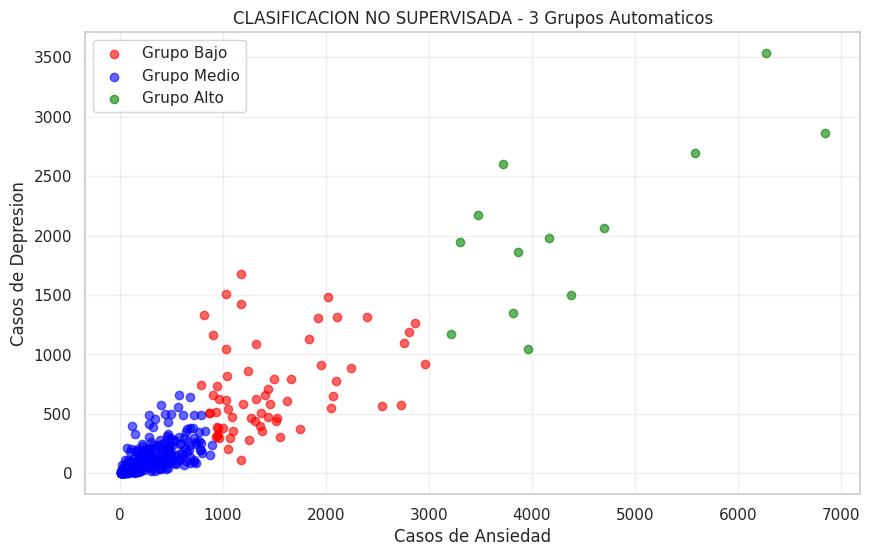

ML encontro patrones automaticamente
Agrupo segun niveles de ansiedad y depresion


In [ ]:
# VISUALIZACION
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

colores = ['red', 'blue', 'green']
nombres_grupos = ['Grupo Bajo', 'Grupo Medio', 'Grupo Alto']

for i in range(3):
    grupo = df_ml[df_ml['grupo_ml'] == i]
    plt.scatter(grupo['ansiedad'], grupo['depresion'],
               c=colores[i], label=nombres_grupos[i], alpha=0.6)

plt.xlabel('Casos de Ansiedad')
plt.ylabel('Casos de Depresion')
plt.title('CLASIFICACION NO SUPERVISADA - 3 Grupos Automaticos')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("ML encontro patrones automaticamente")
print("Agrupo segun niveles de ansiedad y depresion")

In [ ]:
# EN CUANTO A LA CLASIFICACION SUPERVISADA - PREDECIR SEXO
print("CLASIFICACION SUPERVISADA - PREDECIR SEXO")

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Caracteristicas para predecir (X) y lo que queremos predecir (y)
X = df_ml[['ansiedad', 'depresion', 'total', 'grupo_etario_num']]
y = df_ml['sexo_num']

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entrenar modelo
modelo = LogisticRegression()
modelo.fit(X_train, y_train)

# Predecir
predicciones = modelo.predict(X_test)

# Evaluar
precision = accuracy_score(y_test, predicciones)
print(f"Precision del modelo: {precision:.2f} ({precision*100:.0f}%)")

print("El modelo aprendio a predecir sexo basado en:")
print("- Ansiedad")
print("- Depresion")
print("- Total de casos")
print("- Grupo de edad")

CLASIFICACION SUPERVISADA - PREDECIR SEXO
Precision del modelo: 0.69 (69%)
El modelo aprendio a predecir sexo basado en:
- Ansiedad
- Depresion
- Total de casos
- Grupo de edad


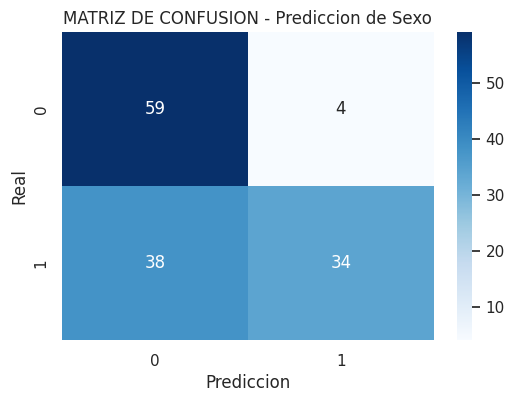

MATRIZ DE CONFUSION:
[[ Verdaderos Hombres   Falsos Hombres ]
 [ Falsas Mujeres     Verdaderas Mujeres ]]


In [ ]:
# MATRIZ DE CONFUSION
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, predicciones)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('MATRIZ DE CONFUSION - Prediccion de Sexo')
plt.xlabel('Prediccion')
plt.ylabel('Real')
plt.show()

print("MATRIZ DE CONFUSION:")
print("[[ Verdaderos Hombres   Falsos Hombres ]")
print(" [ Falsas Mujeres     Verdaderas Mujeres ]]")

In [ ]:
# SOBRE LA CLASIFICACION SUPERVISADA - PREDECIR GRUPO ETARIO
print("CLASIFICACION SUPERVISADA - PREDECIR GRUPO ETARIO")

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Predecir grupo etario basado en trastornos mentales
X2 = df_ml[['ansiedad', 'depresion', 'total', 'trastorno bipolar', 'deficit atencion hiperactividad']]
y2 = df_ml['grupo_etario_num']

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=42)

modelo2 = RandomForestClassifier()
modelo2.fit(X2_train, y2_train)

predicciones2 = modelo2.predict(X2_test)
precision2 = accuracy_score(y2_test, predicciones2)

print(f"Precision para predecir grupo etario: {precision2:.2f} ({precision2*100:.0f}%)")

# Ver importancia de cada caracteristica
importancias = modelo2.feature_importances_
caracteristicas = X2.columns

print("Importancia de cada caracteristica para predecir edad:")
for i, (caract, imp) in enumerate(zip(caracteristicas, importancias)):
    print(f"  {i+1}. {caract}: {imp:.3f}")

CLASIFICACION SUPERVISADA - PREDECIR GRUPO ETARIO
Precision para predecir grupo etario: 0.53 (53%)
Importancia de cada caracteristica para predecir edad:
  1. ansiedad: 0.196
  2. depresion: 0.242
  3. total: 0.178
  4. trastorno bipolar: 0.171
  5. deficit atencion hiperactividad: 0.213


In [ ]:
# RESULTADOS REVISION
print("REVISION FINAL - MACHINE LEARNING")

print("CLASIFICACION NO SUPERVISADA:")
print("- ML agrupo automaticamente en 3 clusters")
print("- Basado en patrones de ansiedad y depresion")
print("- Sin que le digamos como agrupar")

print("\nCLASIFICACION SUPERVISADA:")
print("- Modelo 1: Predecir sexo con " + f"{precision*100:.0f}%" + " de precision")
print("- Modelo 2: Predecir grupo etario con " + f"{precision2*100:.0f}%" + " de precision")
print("- Los modelos aprendieron de datos historicos")

print("\nAPRENDIZAJE:")
print("- ML puede encontrar patrones ocultos en los datos")
print("- Puede predecir caracteristicas basado en otras variables")
print("- Util para entender relaciones complejas en salud mental")

REVISION FINAL - MACHINE LEARNING
CLASIFICACION NO SUPERVISADA:
- ML agrupo automaticamente en 3 clusters
- Basado en patrones de ansiedad y depresion
- Sin que le digamos como agrupar

CLASIFICACION SUPERVISADA:
- Modelo 1: Predecir sexo con 69% de precision
- Modelo 2: Predecir grupo etario con 53% de precision
- Los modelos aprendieron de datos historicos

APRENDIZAJE:
- ML puede encontrar patrones ocultos en los datos
- Puede predecir caracteristicas basado en otras variables
- Util para entender relaciones complejas en salud mental


In [ ]:
# PORCENTAJES
print(f"Precisión para sexo: {precision:.2f}")
print(f"Precisión para edad: {precision2:.2f}")

Precisión para sexo: 0.69
Precisión para edad: 0.53
